In [16]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import pandas as pd

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
clf1 = DecisionTreeClassifier(min_samples_leaf = 3, random_state=1)
clf1.fit(wine_df, wine.target)    
clf1_score = cross_val_score(clf1, wine_df, wine.target)

In [18]:
clf2 = BaggingClassifier(base_estimator =  DecisionTreeClassifier(min_samples_leaf = 3, random_state=1), n_estimators = 50, random_state = 1)
clf2.fit(wine_df, wine.target)    
clf2_score = cross_val_score(clf2, wine_df, wine.target)

In [19]:
clf3 = AdaBoostClassifier(base_estimator =  DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 3, random_state=1), n_estimators = 50, random_state = 1, algorithm = 'SAMME')
clf3.fit(wine_df, wine.target)    
clf3_score = cross_val_score(clf3, wine_df, wine.target)

In [20]:
clf4 = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
clf4.fit(wine_df, wine.target)    
clf4_score = cross_val_score(clf4, wine_df, wine.target)

In [21]:
print(f'Decission tree scores: {clf1_score}')
print(f'Bagging scores: {clf2_score}')
print(f'AdaBoost scores: {clf3_score}')
print(f'Gradient boosting scores scores: {clf4_score}')

Decission tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
Bagging scores: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ]
Gradient boosting scores scores: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]


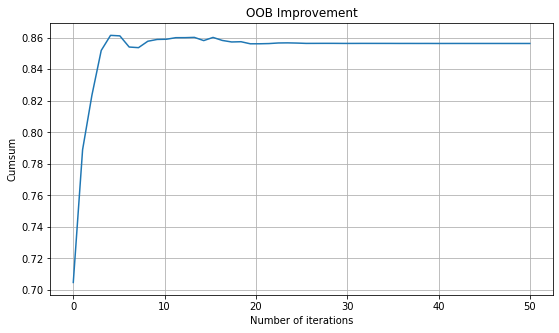

In [22]:
import numpy as np
import matplotlib.pyplot as plt

cumsum = np.cumsum(clf4.oob_improvement_)
plt.figure(figsize=(9,5))
it = np.linspace(0,len(cumsum), 50)
plt.plot(it, cumsum)
plt.xlabel('Number of iterations')
plt.ylabel('Cumsum')
plt.title('OOB Improvement')
plt.grid()
plt.show()